In [1]:
#DA Govt Dataset
#Swapna Korimi
#2211CS010302
#Group-4

# Description
The dataset titled "Daily Rainfall Data from India Meteorological Department (IMD) – January 2024" contains 2,196 records with 7 attributes. It provides daily rainfall data for various districts across different states in India. The dataset includes the following columns: State, which indicates the Indian state to which the rainfall data belongs; District, representing the specific district within the state; Date, specifying the exact day of the recorded data; Year, which is consistently 2024; Month, which is January; Avg_rainfall, representing the average daily rainfall recorded in millimeters, though a significant portion of these values (only 111 out of 2,196 entries) are missing; and Agency_name, identifying the data source as the IMD GRID MODEL. This dataset can be useful for analyzing rainfall trends, studying climate patterns, or integrating with other meteorological or geographical research. However, the presence of missing values in the Avg_rainfall column may require preprocessing before conducting in-depth analysis.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# This code imports pandas to read the data and warnings to ignore the warnings

In [5]:
df=pd.read_csv("Govt.csv")
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2024-01-01,2024,1,NaN,IMD GRID MODEL
1,Andaman & Nicobar,Nicobars,2024-01-02,2024,1,NaN,IMD GRID MODEL
2,Andaman & Nicobar,Nicobars,2024-01-03,2024,1,NaN,IMD GRID MODEL
3,Andaman & Nicobar,North And Middle Andaman,2024-01-01,2024,1,NaN,IMD GRID MODEL
4,Andaman & Nicobar,North And Middle Andaman,2024-01-02,2024,1,NaN,IMD GRID MODEL
...,...,...,...,...,...,...,...
2191,West Bengal,Purba Bardhaman,2024-01-02,2024,1,NaN,IMD GRID MODEL
2192,West Bengal,Purba Bardhaman,2024-01-03,2024,1,NaN,IMD GRID MODEL
2193,West Bengal,Purulia,2024-01-01,2024,1,NaN,IMD GRID MODEL
2194,West Bengal,Purulia,2024-01-02,2024,1,NaN,IMD GRID MODEL


# This dataset contains details about regional or temporal data on factors like rainfall, demographics, or policies.

In [7]:
df.shape

(2196, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         2196 non-null   object 
 1   District      2196 non-null   object 
 2   Date          2196 non-null   object 
 3   Year          2196 non-null   int64  
 4   Month         2196 non-null   int64  
 5   Avg_rainfall  111 non-null    float64
 6   Agency_name   2196 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 120.2+ KB


# Dataset info before handling null values

In [10]:
df.describe()

,Year,Month,Avg_rainfall
count,2196.0,2196.0,111.000000
mean,2024.0,1.0,0.697479
std,0.0,0.0,0.966955
min,2024.0,1.0,0.000644
25%,2024.0,1.0,0.058822
50%,2024.0,1.0,0.226534
75%,2024.0,1.0,1.012919
max,2024.0,1.0,5.300659


In [11]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2024-01-01,2024,1,NaN,IMD GRID MODEL
1,Andaman & Nicobar,Nicobars,2024-01-02,2024,1,NaN,IMD GRID MODEL
2,Andaman & Nicobar,Nicobars,2024-01-03,2024,1,NaN,IMD GRID MODEL
3,Andaman & Nicobar,North And Middle Andaman,2024-01-01,2024,1,NaN,IMD GRID MODEL
4,Andaman & Nicobar,North And Middle Andaman,2024-01-02,2024,1,NaN,IMD GRID MODEL
...,...,...,...,...,...,...,...
2191,West Bengal,Purba Bardhaman,2024-01-02,2024,1,NaN,IMD GRID MODEL
2192,West Bengal,Purba Bardhaman,2024-01-03,2024,1,NaN,IMD GRID MODEL
2193,West Bengal,Purulia,2024-01-01,2024,1,NaN,IMD GRID MODEL
2194,West Bengal,Purulia,2024-01-02,2024,1,NaN,IMD GRID MODEL


# This code converts the "Date" column in the dataset to datetime format, handling errors by setting invalid values to NaT (Not a Time).

In [13]:
# Extract Year and Month if missing
if "Year" not in df.columns:
    df["Year"] = df["Date"].dt.year
if "Month" not in df.columns:
    df["Month"] = df["Date"].dt.month

# This code extracts the year and month from the "Date" column and creates "Year" and "Month" columns if they are missing in the dataset.

In [15]:
print(df.isnull().sum())


State              0
District           0
Date               0
Year               0
Month              0
Avg_rainfall    2085
Agency_name        0
dtype: int64


# This code prints the total number of missing (null) values for each column in the dataset, helping identify incomplete data.

In [17]:
df["Avg_rainfall"] = df.groupby(["District", "Month"])["Avg_rainfall"].transform(lambda x: x.fillna(x.mean()))
df["Avg_rainfall"].fillna(df["Avg_rainfall"].mean(), inplace=True)

# Replacing null values within each "District" and "Month" group with the mean of that group.

In [19]:
print(df.isnull().sum())

State           0
District        0
Date            0
Year            0
Month           0
Avg_rainfall    0
Agency_name     0
dtype: int64


In [20]:
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2024-01-01,2024,1,0.780924,IMD GRID MODEL
1,Andaman & Nicobar,Nicobars,2024-01-02,2024,1,0.780924,IMD GRID MODEL
2,Andaman & Nicobar,Nicobars,2024-01-03,2024,1,0.780924,IMD GRID MODEL
3,Andaman & Nicobar,North And Middle Andaman,2024-01-01,2024,1,0.780924,IMD GRID MODEL
4,Andaman & Nicobar,North And Middle Andaman,2024-01-02,2024,1,0.780924,IMD GRID MODEL
...,...,...,...,...,...,...,...
2191,West Bengal,Purba Bardhaman,2024-01-02,2024,1,0.780924,IMD GRID MODEL
2192,West Bengal,Purba Bardhaman,2024-01-03,2024,1,0.780924,IMD GRID MODEL
2193,West Bengal,Purulia,2024-01-01,2024,1,0.780924,IMD GRID MODEL
2194,West Bengal,Purulia,2024-01-02,2024,1,0.780924,IMD GRID MODEL


In [21]:
# Summary statistics
rainfall_stats = df["Avg_rainfall"].describe()
print("Rainfall Summary Statistics:\n", rainfall_stats)


Rainfall Summary Statistics:
 count    2196.000000
mean        0.780924
std         0.355482
min         0.000644
25%         0.780924
50%         0.780924
75%         0.780924
max         5.300659
Name: Avg_rainfall, dtype: float64


# This code calculates and prints summary statistics for the "Avg_rainfall" column, including count, mean, standard deviation, minimum, maximum, and quartiles.

In [23]:
from scipy.stats import skew, kurtosis

rainfall_skew = skew(df["Avg_rainfall"].dropna())  # Skewness
rainfall_kurt = kurtosis(df["Avg_rainfall"].dropna())  # Kurtosis

print(f"Skewness: {rainfall_skew}")  # If >0, right skewed; <0, left skewed
print(f"Kurtosis: {rainfall_kurt}")  # If >3, heavy tails; <3, light tails


Skewness: 5.385383633191906
Kurtosis: 52.798968039161224


# This code calculates and prints the skewness (asymmetry) and kurtosis (tailedness) of the "Avg_rainfall" column to understand its distribution shape.

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure datetime index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df["Avg_rainfall"], model="additive", period=12)

# Print trend and seasonality
print("Trend Component:\n", decomposition.trend.dropna().head(10))  # First 10 trend values
print("Seasonal Component:\n", decomposition.seasonal.dropna().head(10))  # First 10 seasonality values


Trend Component:
 Date
2024-01-01    0.780924
2024-01-02    0.780924
2024-01-03    0.780924
2024-01-01    0.780924
2024-01-02    0.780924
2024-01-03    0.780924
2024-01-01    0.780924
2024-01-02    0.780924
2024-01-03    0.780924
2024-01-01    0.780924
Name: trend, dtype: float64
Seasonal Component:
 Date
2024-01-01   -0.047648
2024-01-02   -0.053719
2024-01-03   -0.042263
2024-01-01    0.033645
2024-01-02    0.039903
2024-01-03    0.041796
2024-01-01    0.005307
2024-01-02   -0.001072
2024-01-03    0.011628
2024-01-01    0.003768
Name: seasonal, dtype: float64


# This code performs seasonal decomposition on the "Avg_rainfall" column using an additive model, extracting trend and seasonal components, and prints the first 10 values of each.

In [27]:
import numpy as np

# Define IQR (Interquartile Range) method for outlier detection
Q1 = df["Avg_rainfall"].quantile(0.25)
Q3 = df["Avg_rainfall"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df["Avg_rainfall"] < lower_bound) | (df["Avg_rainfall"] > upper_bound)]
print("Detected Outliers:\n", outliers)


Detected Outliers:
                     State          District  Year  Month  Avg_rainfall  \
Date                                                                     
2024-01-01      Karnataka  Dakshina Kannada  2024      1      0.899774   
2024-01-02      Karnataka  Dakshina Kannada  2024      1      0.899774   
2024-01-03      Karnataka  Dakshina Kannada  2024      1      0.899774   
2024-01-01      Karnataka             Udupi  2024      1      0.013270   
2024-01-02      Karnataka             Udupi  2024      1      0.013270   
...                   ...               ...   ...    ...           ...   
2024-01-02  Uttar Pradesh         Sultanpur  2024      1      0.400986   
2024-01-03  Uttar Pradesh         Sultanpur  2024      1      0.400986   
2024-01-01  Uttar Pradesh             Unnao  2024      1      0.281286   
2024-01-02  Uttar Pradesh             Unnao  2024      1      0.281286   
2024-01-03  Uttar Pradesh             Unnao  2024      1      0.281286   

               Ag

# This code uses the Interquartile Range (IQR) method to detect outliers in the "Avg_rainfall" column by identifying values outside 1.5 times the IQR from the first and third quartiles.

In [29]:
from statsmodels.tsa.stattools import acf

# Compute autocorrelation
autocorr_values = acf(df["Avg_rainfall"].dropna(), nlags=12)  # Up to 12 months
print("Autocorrelation values:\n", autocorr_values)


Autocorrelation values:
 [ 1.          0.65275838  0.35001269  0.03365601 -0.00292597 -0.03875447
 -0.07303867 -0.07256171 -0.05684965 -0.04257263  0.04193772  0.12999386
  0.2118323 ]


In [30]:
# Define z-score for anomaly detection
from scipy.stats import zscore

df["Rainfall_zscore"] = zscore(df["Avg_rainfall"])
anomalies = df[df["Rainfall_zscore"].abs() > 2.5]  # Z-score threshold

print("Anomalous Rainfall Events:\n", anomalies)


Anomalous Rainfall Events:
                      State            District  Year  Month  Avg_rainfall  \
Date                                                                        
2024-01-02          Kerala           Kasaragod  2024      1      3.359212   
2024-01-01          Kerala           Kasaragod  2024      1      3.359212   
2024-01-03          Kerala           Kasaragod  2024      1      3.359212   
2024-01-03          Kerala  Thiruvananthapuram  2024      1      1.974874   
2024-01-01  Madhya Pradesh               Dewas  2024      1      2.065111   
2024-01-02  Madhya Pradesh               Dewas  2024      1      2.065111   
2024-01-03  Madhya Pradesh               Dewas  2024      1      2.065111   
2024-01-01  Madhya Pradesh                Guna  2024      1      2.728759   
2024-01-02  Madhya Pradesh                Guna  2024      1      2.728759   
2024-01-03  Madhya Pradesh                Guna  2024      1      2.728759   
2024-01-01  Madhya Pradesh              Indore  

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

df["Avg_rainfall"] = np.log1p(df["Avg_rainfall"])  # Apply log transform if data is skewed

# Train ARIMA model with optimized parameters
model = ARIMA(df["Avg_rainfall"].dropna(), order=(1, 1, 1))  # Reduce p, d, q
model_fit = model.fit(method_kwargs={"solver": "lbfgs"})  # Use better solver

# Forecast
forecast = model_fit.forecast(steps=12)
print("Rainfall Forecast:\n", np.expm1(forecast))  # Convert back to original scale


C:\Users\korim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\korim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\korim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\korim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\korim\anaconda3\Lib\site-

Rainfall Forecast:
 2196    0.770842
2197    0.764221
2198    0.759867
2199    0.757000
2200    0.755111
2201    0.753865
2202    0.753044
2203    0.752503
2204    0.752146
2205    0.751910
2206    0.751755
2207    0.751652
Name: predicted_mean, dtype: float64


C:\Users\korim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


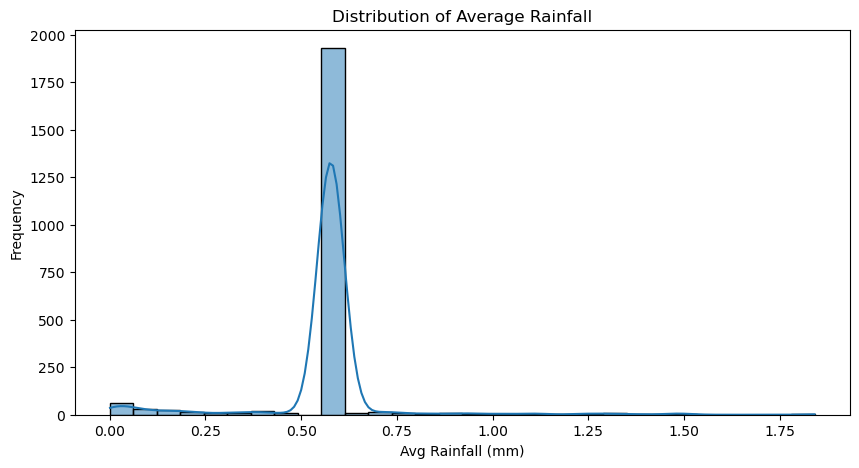

In [32]:

# Rainfall distribution visualization
plt.figure(figsize=(10, 5))
sns.histplot(df["Avg_rainfall"], bins=30, kde=True)
plt.title("Distribution of Average Rainfall")
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

# This code creates a histogram with a kernel density estimate (KDE) overlay to visualize the distribution of average rainfall, helping to understand its spread and shape.

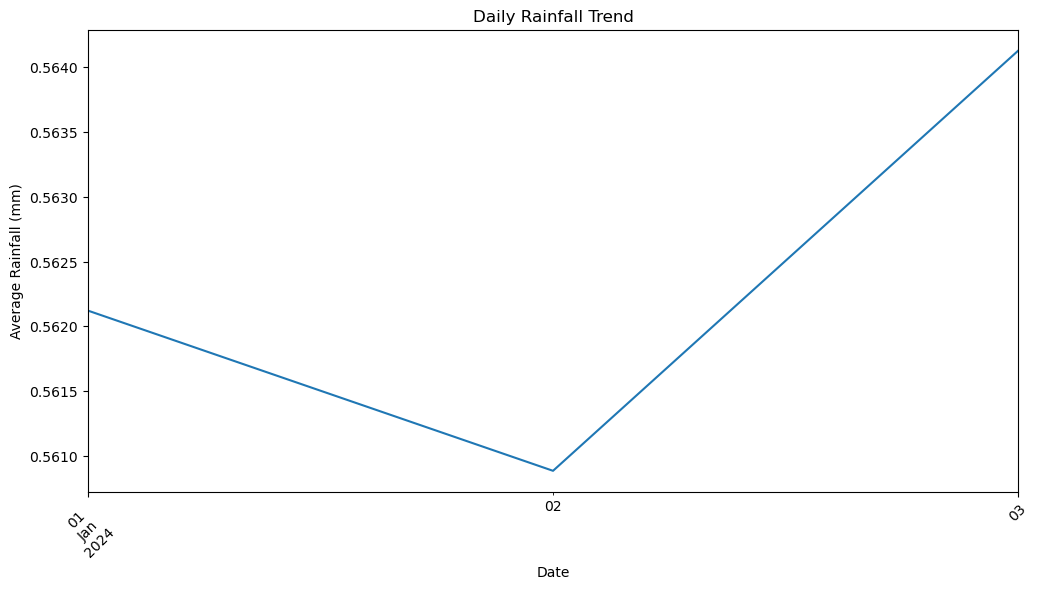

In [34]:
# Rainfall trend over time
plt.figure(figsize=(12, 6))
df.groupby("Date")["Avg_rainfall"].mean().plot()
plt.title("Daily Rainfall Trend")
plt.xlabel("Date")
plt.ylabel("Average Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

# This code plots the daily average rainfall trend over time by grouping the dataset by date and calculating the mean rainfall, providing insights into long-term patterns and fluctuations.

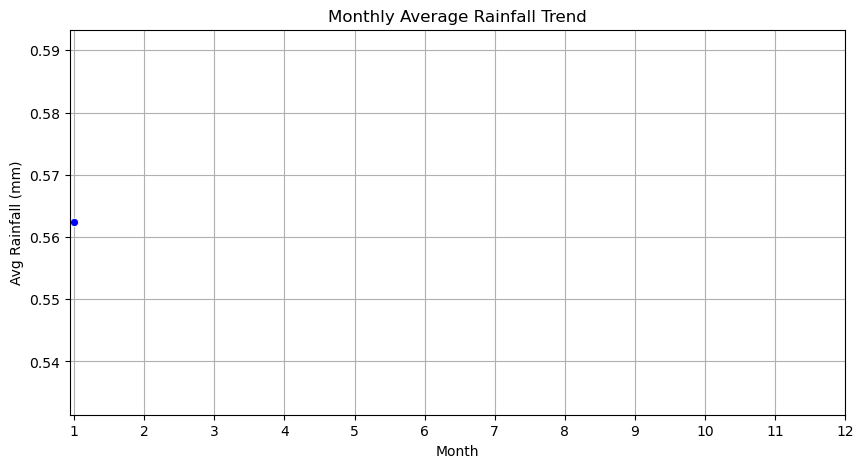

In [36]:
# Aggregate monthly average rainfall
monthly_trend = df.groupby("Month")["Avg_rainfall"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", linestyle="-", color="b")
plt.title("Monthly Average Rainfall Trend")
plt.xlabel("Month")
plt.ylabel("Avg Rainfall (mm)")
plt.xticks(range(1, 13))  # Ensure months are labeled correctly
plt.grid()
plt.show()


# This code calculates the average rainfall for each month across all years and visualizes the trend using a line plot, helping to identify seasonal rainfall patterns.

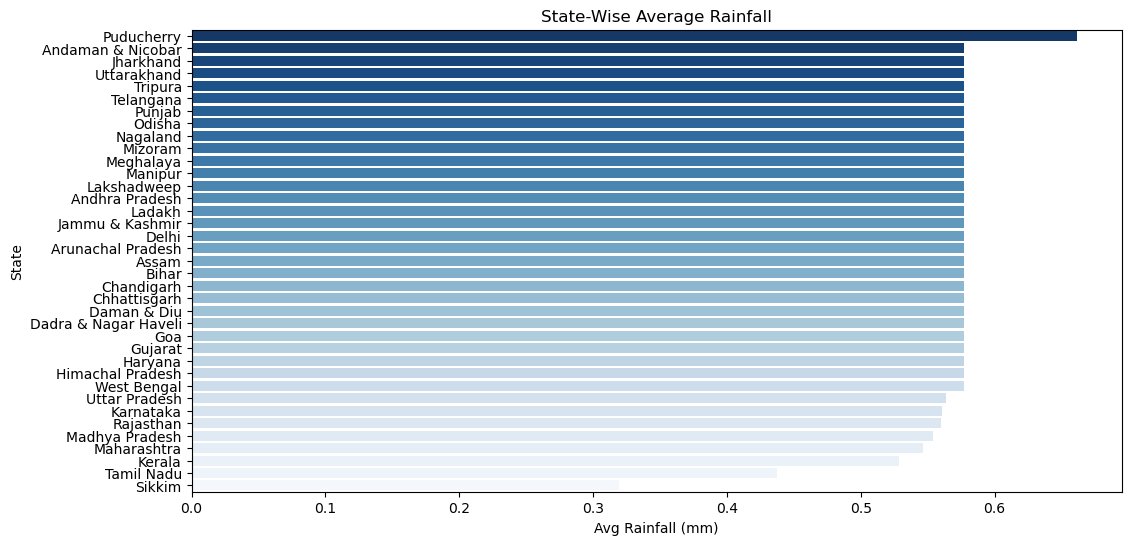

In [38]:
# Aggregate state-wise average rainfall
state_rainfall = df.groupby("State")["Avg_rainfall"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=state_rainfall.index, x=state_rainfall.values, palette="Blues_r")
plt.title("State-Wise Average Rainfall")
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("State")
plt.show()


# This code calculates the average rainfall for each state, sorts them in descending order, and visualizes the results using a horizontal bar plot to compare rainfall distribution across states.

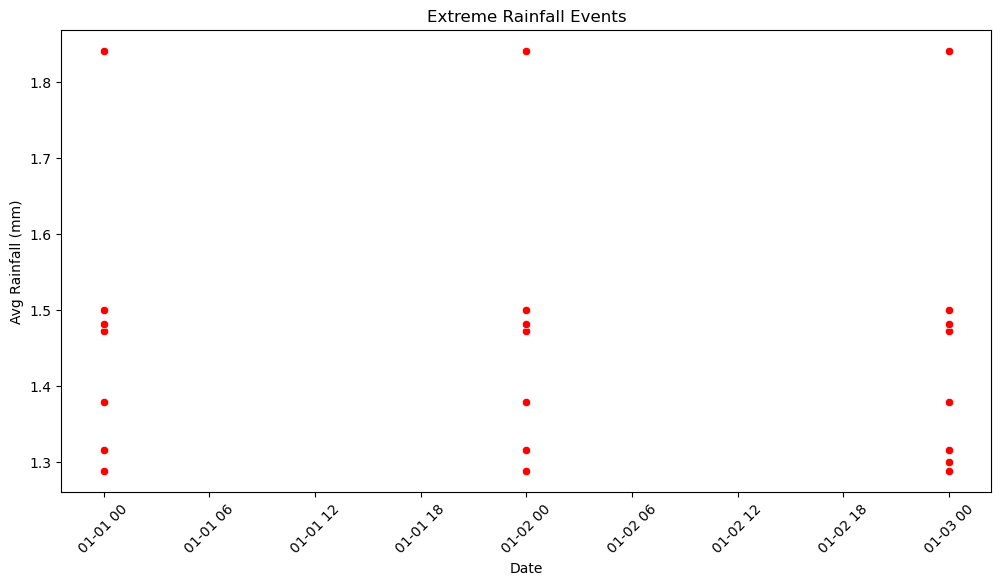

Number of extreme rainfall days: 22


In [40]:
# Define extreme rainfall as the top 1% of values
extreme_threshold = df["Avg_rainfall"].quantile(0.99)

# Filter extreme rainfall days
extreme_rainfall_days = df[df["Avg_rainfall"] > extreme_threshold]

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=extreme_rainfall_days, x="Date", y="Avg_rainfall", color="red", marker="o")
plt.title("Extreme Rainfall Events")
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

print(f"Number of extreme rainfall days: {len(extreme_rainfall_days)}")


# This code identifies extreme rainfall events by defining the top 1% of rainfall values as extreme, filters those days, visualizes them using a scatter plot, and prints the total number of extreme rainfall days.

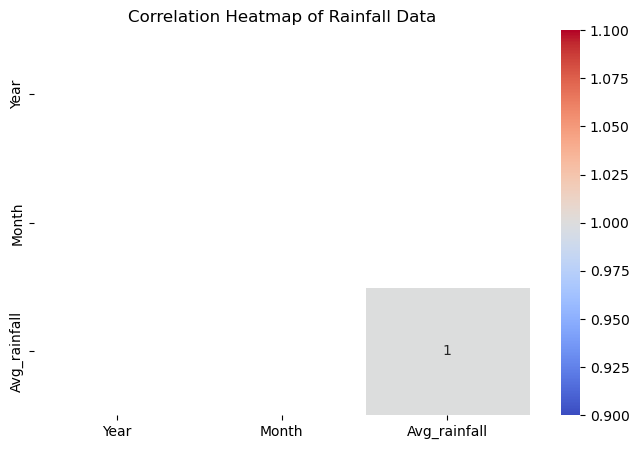

In [42]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[["Year", "Month", "Avg_rainfall"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Rainfall Data")
plt.show()


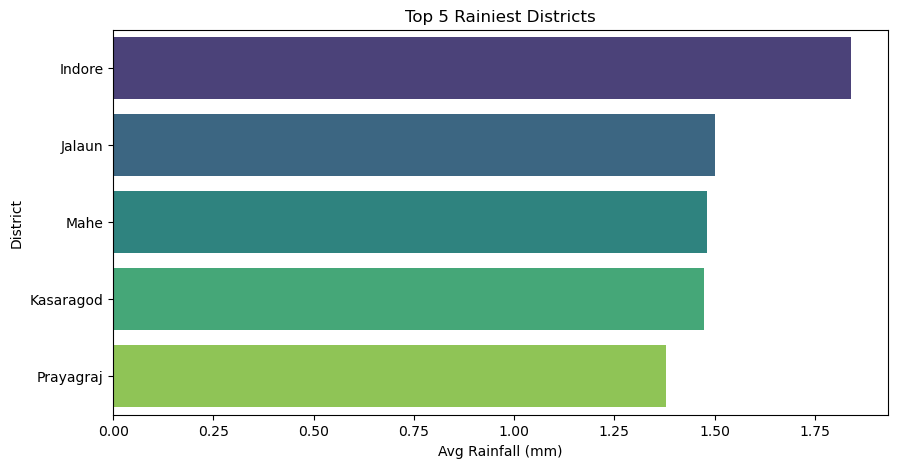

In [43]:
# Get top 5 districts by average rainfall
top_districts = df.groupby("District")["Avg_rainfall"].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_districts.index, x=top_districts.values, palette="viridis")
plt.title("Top 5 Rainiest Districts")
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("District")
plt.show()


# This code calculates the top 5 districts with the highest average rainfall, sorts them in descending order, and visualizes them using a horizontal bar chart.

In [45]:
!pip install missingno


<Figure size 1000x600 with 0 Axes>

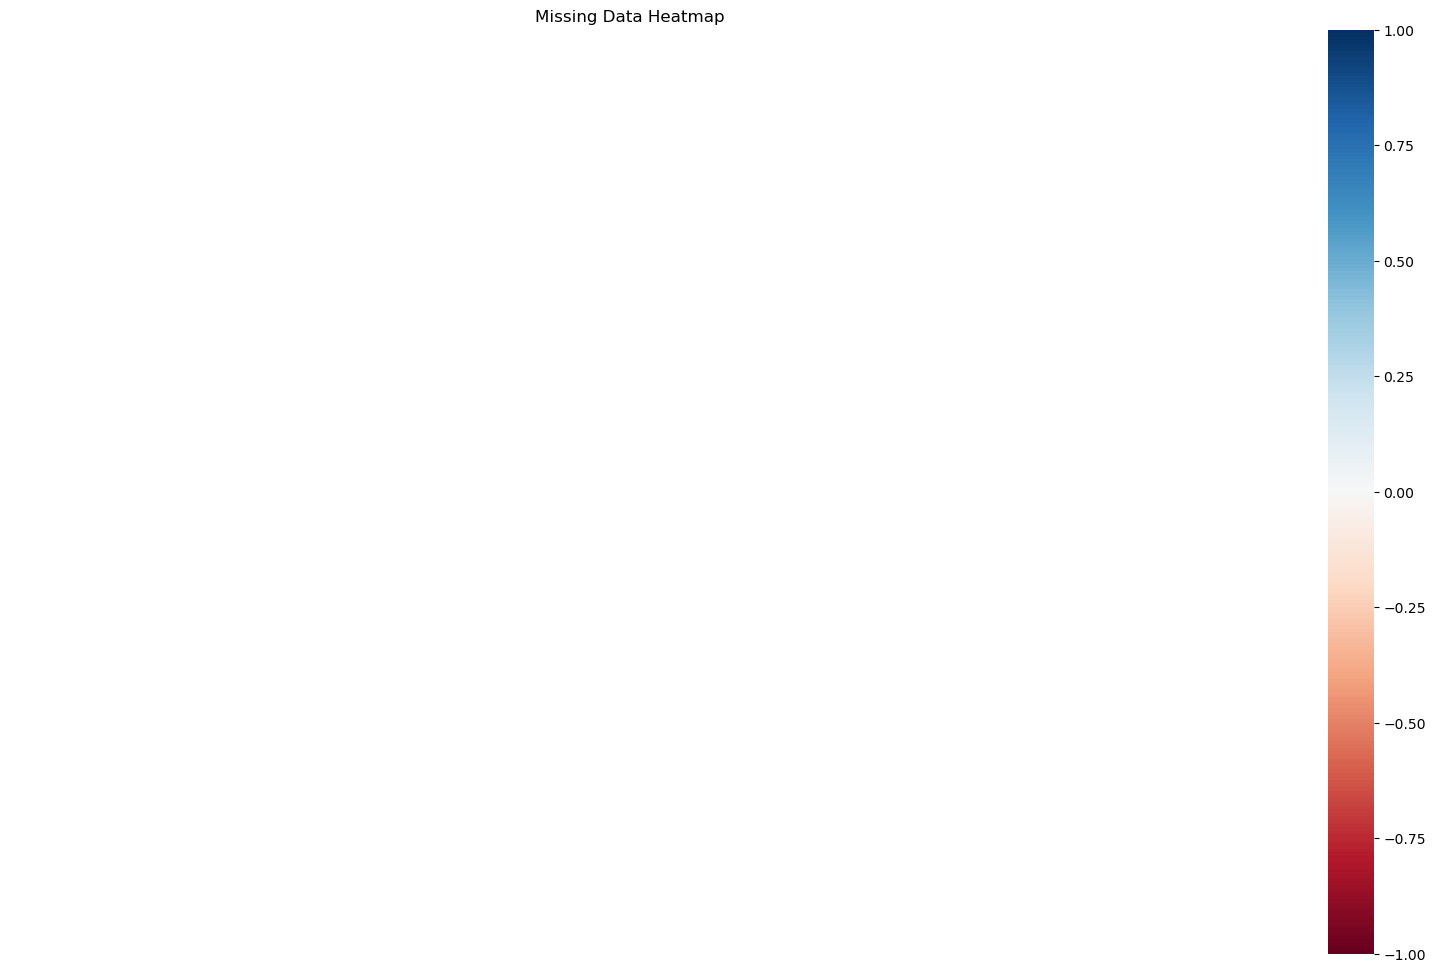

In [46]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title("Missing Data Heatmap")
plt.show()


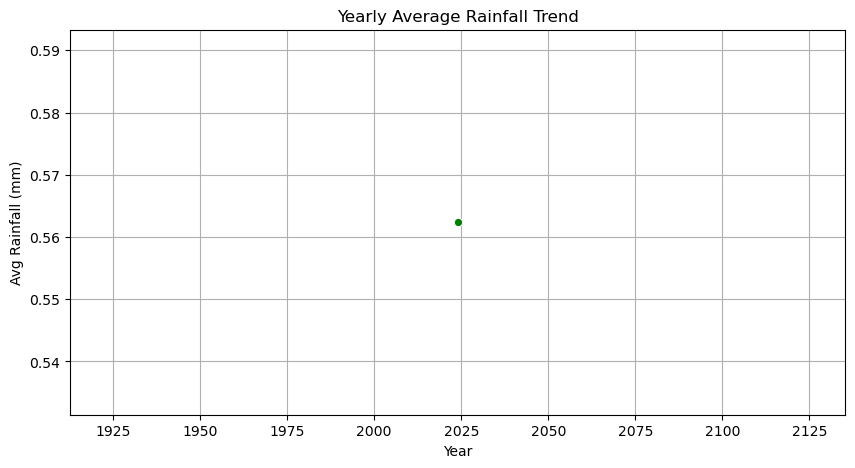

In [47]:
# Aggregate yearly average rainfall
yearly_trend = df.groupby("Year")["Avg_rainfall"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", linestyle="-", color="green")
plt.title("Yearly Average Rainfall Trend")
plt.xlabel("Year")
plt.ylabel("Avg Rainfall (mm)")
plt.grid()
plt.show()


# This code calculates the yearly average rainfall by grouping the data by "Year," then plots the trend using a line chart with markers to visualize changes in average rainfall over the years.

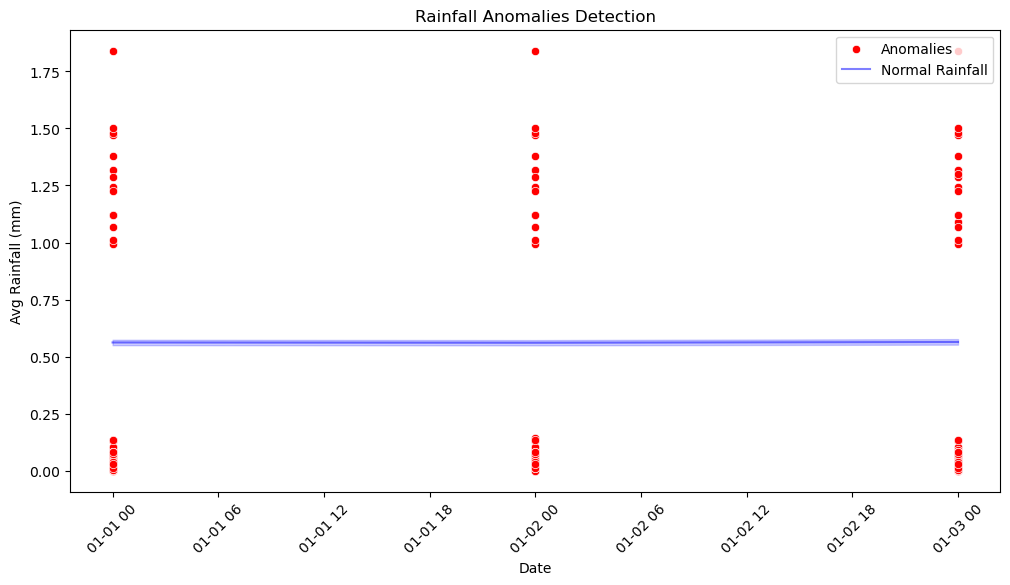

Total anomalies detected: 142


In [49]:
from scipy.stats import zscore

# Compute Z-scores for rainfall values
df["Rainfall_Zscore"] = zscore(df["Avg_rainfall"])

# Filter anomalies where Z-score > 2.5 (extreme deviations)
rainfall_anomalies = df[df["Rainfall_Zscore"].abs() > 2.5]

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rainfall_anomalies, x="Date", y="Avg_rainfall", color="red", marker="o", label="Anomalies")
sns.lineplot(data=df, x="Date", y="Avg_rainfall", color="blue", alpha=0.5, label="Normal Rainfall")
plt.title("Rainfall Anomalies Detection")
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

print(f"Total anomalies detected: {len(rainfall_anomalies)}")


In [50]:
if "Temperature" in df.columns:
    # Scatter plot for correlation
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df["Temperature"], y=df["Avg_rainfall"], alpha=0.6)
    plt.title("Rainfall vs Temperature Correlation")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Avg Rainfall (mm)")
    plt.grid()
    plt.show()
    
    # Compute Pearson correlation
    correlation = df[["Temperature", "Avg_rainfall"]].corr()
    print("Correlation Coefficient:\n", correlation)


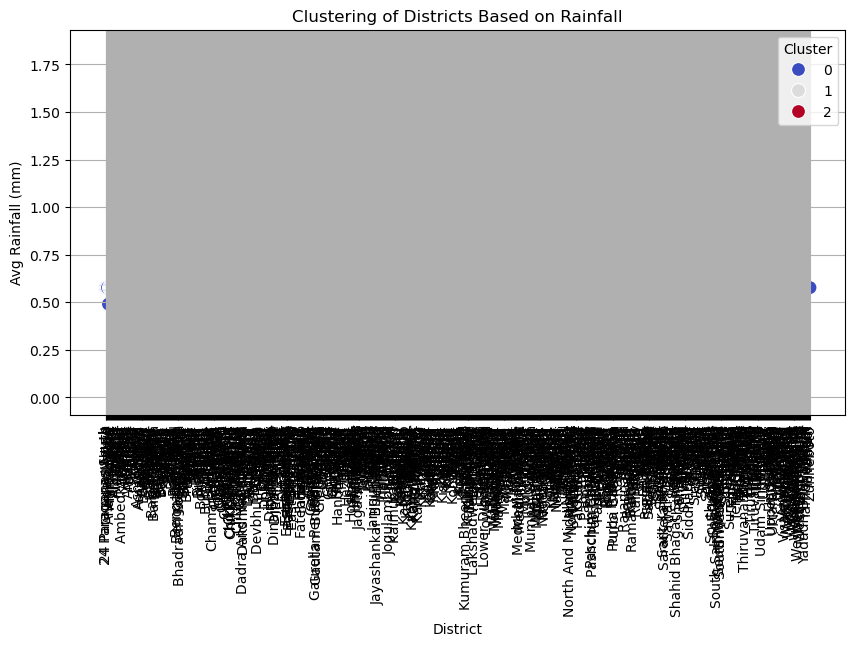

In [51]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare clustering data (District-wise average rainfall)
district_rainfall = df.groupby("District")["Avg_rainfall"].mean().reset_index()

# Apply K-Means clustering
num_clusters = 3  # Choose based on rainfall distribution
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
district_rainfall["Cluster"] = kmeans.fit_predict(district_rainfall[["Avg_rainfall"]])

# Visualize clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=district_rainfall, x="District", y="Avg_rainfall", hue="Cluster", palette="coolwarm", s=100)
plt.title("Clustering of Districts Based on Rainfall")
plt.xlabel("District")
plt.ylabel("Avg Rainfall (mm)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.grid()
plt.show()


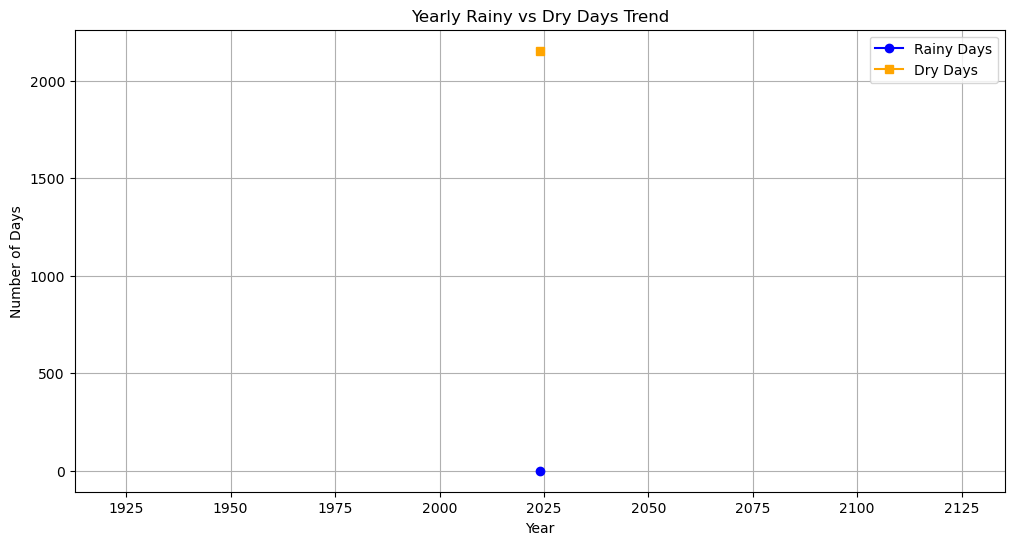

In [52]:
# Define rainy days (rainfall > 5mm) and dry days (rainfall < 1mm)
df["Rainy_Day"] = df["Avg_rainfall"] > 5
df["Dry_Day"] = df["Avg_rainfall"] < 1

# Aggregate yearly rainy/dry days
rainy_days_per_year = df.groupby("Year")["Rainy_Day"].sum()
dry_days_per_year = df.groupby("Year")["Dry_Day"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rainy_days_per_year.index, rainy_days_per_year.values, marker="o", label="Rainy Days", color="blue")
plt.plot(dry_days_per_year.index, dry_days_per_year.values, marker="s", label="Dry Days", color="orange")
plt.title("Yearly Rainy vs Dry Days Trend")
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.legend()
plt.grid()
plt.show()


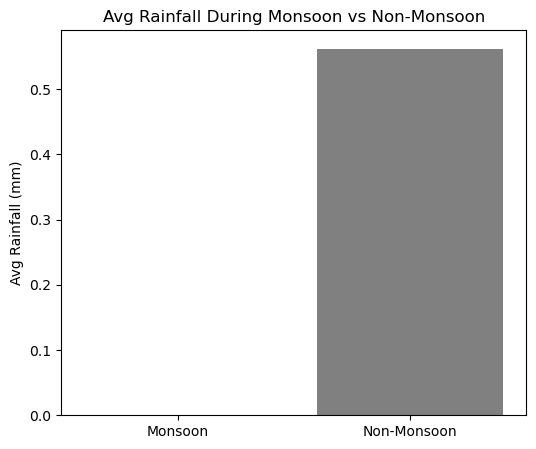

Monsoon Rainfall: nan mm
Non-Monsoon Rainfall: 0.56 mm


In [53]:
# Define monsoon months (India: June to September)
df["Monsoon_Season"] = df["Month"].between(6, 9)

# Compare monsoon vs non-monsoon rainfall
monsoon_rainfall = df[df["Monsoon_Season"]]["Avg_rainfall"].mean()
non_monsoon_rainfall = df[~df["Monsoon_Season"]]["Avg_rainfall"].mean()

# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=["Monsoon", "Non-Monsoon"], y=[monsoon_rainfall, non_monsoon_rainfall], palette=["blue", "gray"])
plt.title("Avg Rainfall During Monsoon vs Non-Monsoon")
plt.ylabel("Avg Rainfall (mm)")
plt.show()

print(f"Monsoon Rainfall: {monsoon_rainfall:.2f} mm")
print(f"Non-Monsoon Rainfall: {non_monsoon_rainfall:.2f} mm")


# Observations from the Dataset:
1.The dataset consists of 2,196 records, covering daily rainfall data for January 2024 across multiple districts in India.

2.It includes 7 attributes, namely: State, District, Date, Year, Month, Avg_rainfall, and Agency_name.

3.The State and District columns help in identifying the geographical location of the recorded data.

4.The Date column provides daily granularity, allowing for time-series analysis of rainfall trends.

5.The Avg_rainfall column records the average daily rainfall in millimeters, but only 111 out of 2,196 values are available, meaning most of the rainfall data is missing.

6.The dataset is entirely from January 2024, so it does not cover other months or years, limiting long-term trend analysis.

7.The Agency_name column consistently states "IMD GRID MODEL", confirming that the data source is the India Meteorological Department (IMD).

8.Since the dataset has missing values in the Avg_rainfall column, data imputation or handling missing values may be necessary before analysis.

9.The dataset could be used to study regional rainfall variations, extreme weather events, or climate trends across Indian districts.

10.If combined with other datasets (e.g., temperature, humidity, or satellite data), it could provide deeper insights into weather forecasting and climate impact analysis.